<a href="https://colab.research.google.com/github/KatBotkowska/Pandas-Numpy-exercices/blob/master/Bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PYCOINGECKO
IBM COURSE PYTHON FOR DATA SCIENCE , AI AND DEVELOPMENT

In [1]:
!pip install pycoingecko
!pip install plotly
!pip install mplfinance

     |████████████████████████████████| 61kB 3.4MB/s 


In [3]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.offline import plot
import matplotlib.pyplot as plt
import datetime
from pycoingecko import CoinGeckoAPI
from mplfinance.original_flavor import candlestick2_ohlc

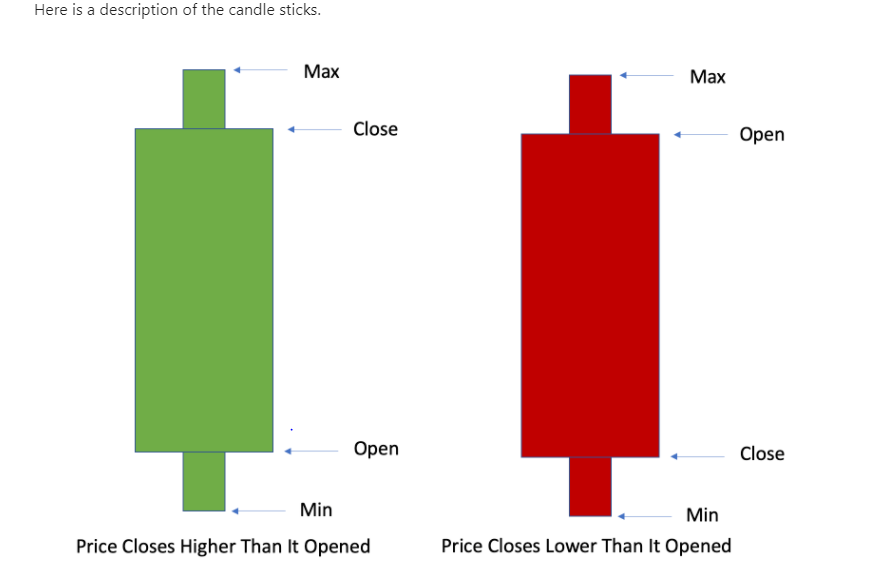

In this lab, we will be using the <a href=https://www.coingecko.com/en/api>CoinGecko API</a> to create one of these candlestick graphs for Bitcoin. We will use the API to get the price data for 30 days with 24 observation per day, 1 per hour. We will find the max, min, open, and close price per day meaning we will have 30 candlesticks and use that to generate the candlestick graph. Although we are using the CoinGecko API we will use a Python client/wrapper for the API called <a href=https://github.com/man-c/pycoingecko>PyCoinGecko</a>. PyCoinGecko will make performing the requests easy and it will deal with the enpoint targeting.


In [5]:
cg = CoinGeckoAPI()

bitcoin_data = cg.get_coin_market_chart_by_id(id='bitcoin', vs_currency='usd', days=30)

In [6]:
#The response we get is in the form of a JSON which includes the price, market caps, and total volumes along with timestamps for each observation. We are focused on the prices so we will select that data.

type(bitcoin_data )

dict

In [7]:
bitcoin_price_data = bitcoin_data['prices']

bitcoin_price_data[0:5]

[[1614715771579, 47713.36032243839],
 [1614718913155, 47586.12695849137],
 [1614722723013, 47607.37678546142],
 [1614726268737, 47965.89725776837],
 [1614730055325, 48550.026478604326]]

In [8]:
data = pd.DataFrame(bitcoin_price_data, columns=['TimeStamp', 'Price'])

In [9]:
data['Date'] = pd.to_datetime(data['TimeStamp'], unit='ms')

In [10]:
candlestick_data = data.groupby(data.Date.dt.date, as_index=False).agg({"Price": ['min', 'max', 'first', 'last']})

In [11]:
fig = go.Figure(data=[go.Candlestick(x=data['Date'],
                open=candlestick_data['Price']['first'], 
                high=candlestick_data['Price']['max'],
                low=candlestick_data['Price']['min'], 
                close=candlestick_data['Price']['last'])
                ])

fig.update_layout(xaxis_rangeslider_visible=False)

fig.show()